**AIM OF PROJECT: predicting fetal health by CTG analysis results with ML**

For calculating fetal health, we use a device called Cardiotocography (CTG) or electronic fetal monitor, so let's learn about CTG.
About Cardiotocography (CTG) or electronic fetal monitor:-

Cardiotocography (CTG) is a continuous recording of the fetal heart rate obtained via an ultrasound transducer placed on the mother's abdomen.
CTG is widely used in pregnancy as a method of assessing fetal well-being,predominantly in pregnancies with increased risk of complications.
What we find using CTG and when we use CTG:-

A cardiotocography (CTG) test is a medical procedure that monitors a pregnant woman's fetal heartbeat and uterine contractions.
It's often performed during the third trimester, and is used to assess the baby's well-being, identify problems, and monitor the baby's response during labor.
The CTG monitors several different measures, including: Uterine contractions, Baseline heart rate, Variability, Accelerations, and Decelerations.
The CTG is typically recommended for pregnancies with an increased risk of complications. The recommended duration of CTG monitoring is 30 minutes, but the duration can be prolonged if the FHR pattern looks suspicious.
The fetal heart rate (FHR) is classified into: Baseline fetal heart rate, Oscillations, Oscillation amplitude (range), and Long-term oscillations (oscillation rate).
Factors that can affect FHR include: Maternal, Fetoplacental, Fetal, and Exogenous.

**METADATA:**

Baseline value: This feature indicates the FHR (fetal heart rate) per BPM (Beats Per Minute).
Accelerations: Number of accelerations per second.
Fetal movement: Number of fetal movements per second.
Uterine contractions: Number of uterine contractions per second.
Light decelerations: Number of LDs (light decelerations) per second.
Severe decelerations: Number of SDs (severe decelerations) per second.
Prolongued decelerations: Number of PDs (prolonged decelerations) per second.
ASTV: Percentage of time with abnormal short-term variability.
MSTV: Mean value of short-term variability.
ALTV: Percentage of time with abnormal long-term variability.
MLTV: Mean value of long-term variability.
Width: Width of FHR histogram.
Min: Minimum of FHR histogram.
Max: Maximum of FHR histogram.
Nmax: Number of histogram peaks.
Nzeros: Number of histogram zeroes.
Mode: Histogram mode.
Medianc: Histogram median.
Variance: Histogram variance.
Tendency: Histogram Tendency.
Target: Fetal_Health :- Fetal state class code (N=Normal, S=Suspected, P=Pathological)


**EXPLORATORY DATA ANALYSIS**

In [529]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.subplots as sp  
import plotly.express as px

from plotly.subplots import make_subplots
plt.style.use('seaborn-v0_8-whitegrid')

In [530]:
#Let's start by reading the dataset

import numpy as np
import pandas as pd

df = pd.read_csv("../Data/Raw/fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [531]:
df.shape

(2126, 22)

In [532]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [533]:
df.rename(columns={'baseline value': 'baseline_value_FHR(BPM)',
                   'mean_value_of_short_term_variability':'mean_abnormal_short_term_variability',
                   'mean_value_of_long_term_variability':'mean_abnormal_long_term_variability',
                   'histogram_width': 'FHR_width',
                   'histogram_min': 'FHR_min',
                   'histogram_max': 'FHR_max',
                   'histogram_number_of_peaks':'FHR_n_of_peaks',
                   'histogram_number_of_zeroes': 'FHR_n_of_zeros',
                   'histogram_mode': 'FHR_mode', 
                   'histogram_mean': 'FHR_mean',
                   'histogram_median': 'FHR_median',
                   'histogram_variance': 'FHR_variance', 
                   'histogram_tendency': 'FHR_tendency'
                  }, inplace=True)
df.columns

Index(['baseline_value_FHR(BPM)', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_abnormal_long_term_variability', 'FHR_width', 'FHR_min',
       'FHR_max', 'FHR_n_of_peaks', 'FHR_n_of_zeros', 'FHR_mode', 'FHR_mean',
       'FHR_median', 'FHR_variance', 'FHR_tendency', 'fetal_health'],
      dtype='object')

In [534]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline_value_FHR(BPM),2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_abnormal_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [535]:
df.dtypes

baseline_value_FHR(BPM)                                   float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_abnormal_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_abnormal_long_term_variability                       float64
FHR_width                                                 float64
FHR_min                                                   float64
FHR_max                                                   float64
FHR_n_of_peaks                                            float64
FHR_n_of_z

In [536]:
df.isna().sum()
#no null found

baseline_value_FHR(BPM)                                   0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_abnormal_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_abnormal_long_term_variability                       0
FHR_width                                                 0
FHR_min                                                   0
FHR_max                                                   0
FHR_n_of_peaks                                            0
FHR_n_of_zeros                                            0
FHR_mode                                

In [537]:
df.duplicated().sum()

#very few duplicated values: can be dropped

np.int64(13)

In [538]:
#drop duplicated values:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [539]:
df.shape

(2113, 22)

In [541]:
df['fetal_health'].value_counts()
#these values are imbalanced: keep in mind for ML model

fetal_health
1.0    1646
2.0     292
3.0     175
Name: count, dtype: int64

In [542]:
# rename to make easy to understand visualiztion
df['fetal_health'] = df['fetal_health'].replace({1:'Normal',2:'Suspect' ,3:'Pathological'})

In [543]:
df['fetal_health'].value_counts()

fetal_health
Normal          1646
Suspect          292
Pathological     175
Name: count, dtype: int64

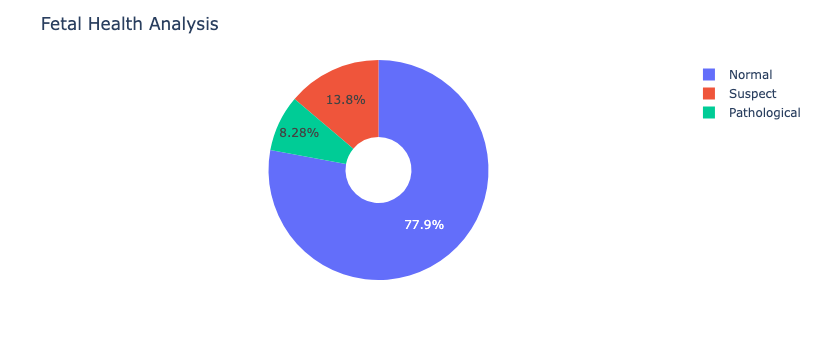

In [544]:
import plotly.express as px

# Count the values for fetal_health
x = df.fetal_health.value_counts().sort_values(ascending=False)

# Create a pie chart with a hole
pie_chart = px.pie(df, names='fetal_health', hole=0.3)

# Update the layout of the pie chart
pie_chart.update_layout(title_text="Fetal Health Analysis")

# Show the pie chart
pie_chart.show()

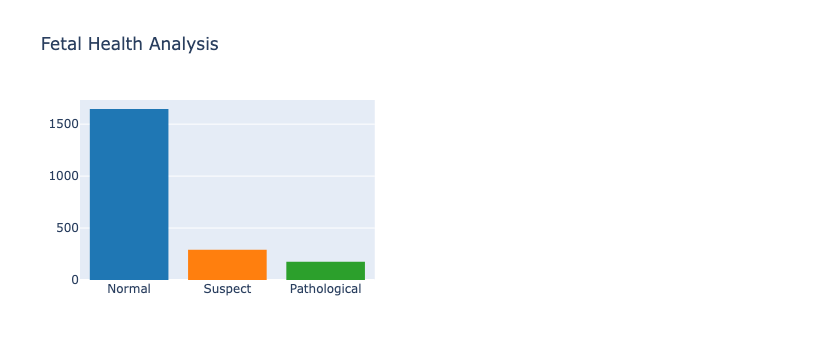

In [545]:
# Count the values for fetal_health and sort them in descending order
x = df.fetal_health.value_counts().sort_values(ascending=False)

# Create a histogram from the counts
histogram = px.histogram(x=x.index, y=x.values)

# Create subplots
plots = make_subplots(rows=1, cols=2, specs=[[{'type': 'xy'}, {'type': 'domain'}]])

# Add the histogram trace to the subplot
plots.add_trace(histogram['data'][0])

# Specify different colors for the bars
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Example colors

# Update the colors of the bars
plots.data[0].marker.color = bar_colors * (len(plots.data[0].y) // len(bar_colors) + 1)  # Repeat colors as needed
plots.data[0].marker.color = plots.data[0].marker.color[:len(plots.data[0].y)]  # Adjust length to match bars

# Update the layout
plots.update_layout(title_text="Fetal Health Analysis")

# Show the plot
plots.show()

In [546]:
#show fetal FHR mean, uterus contraction mean, fetal movements mean how they 
#affect featl health

In [547]:
#statistical analysis

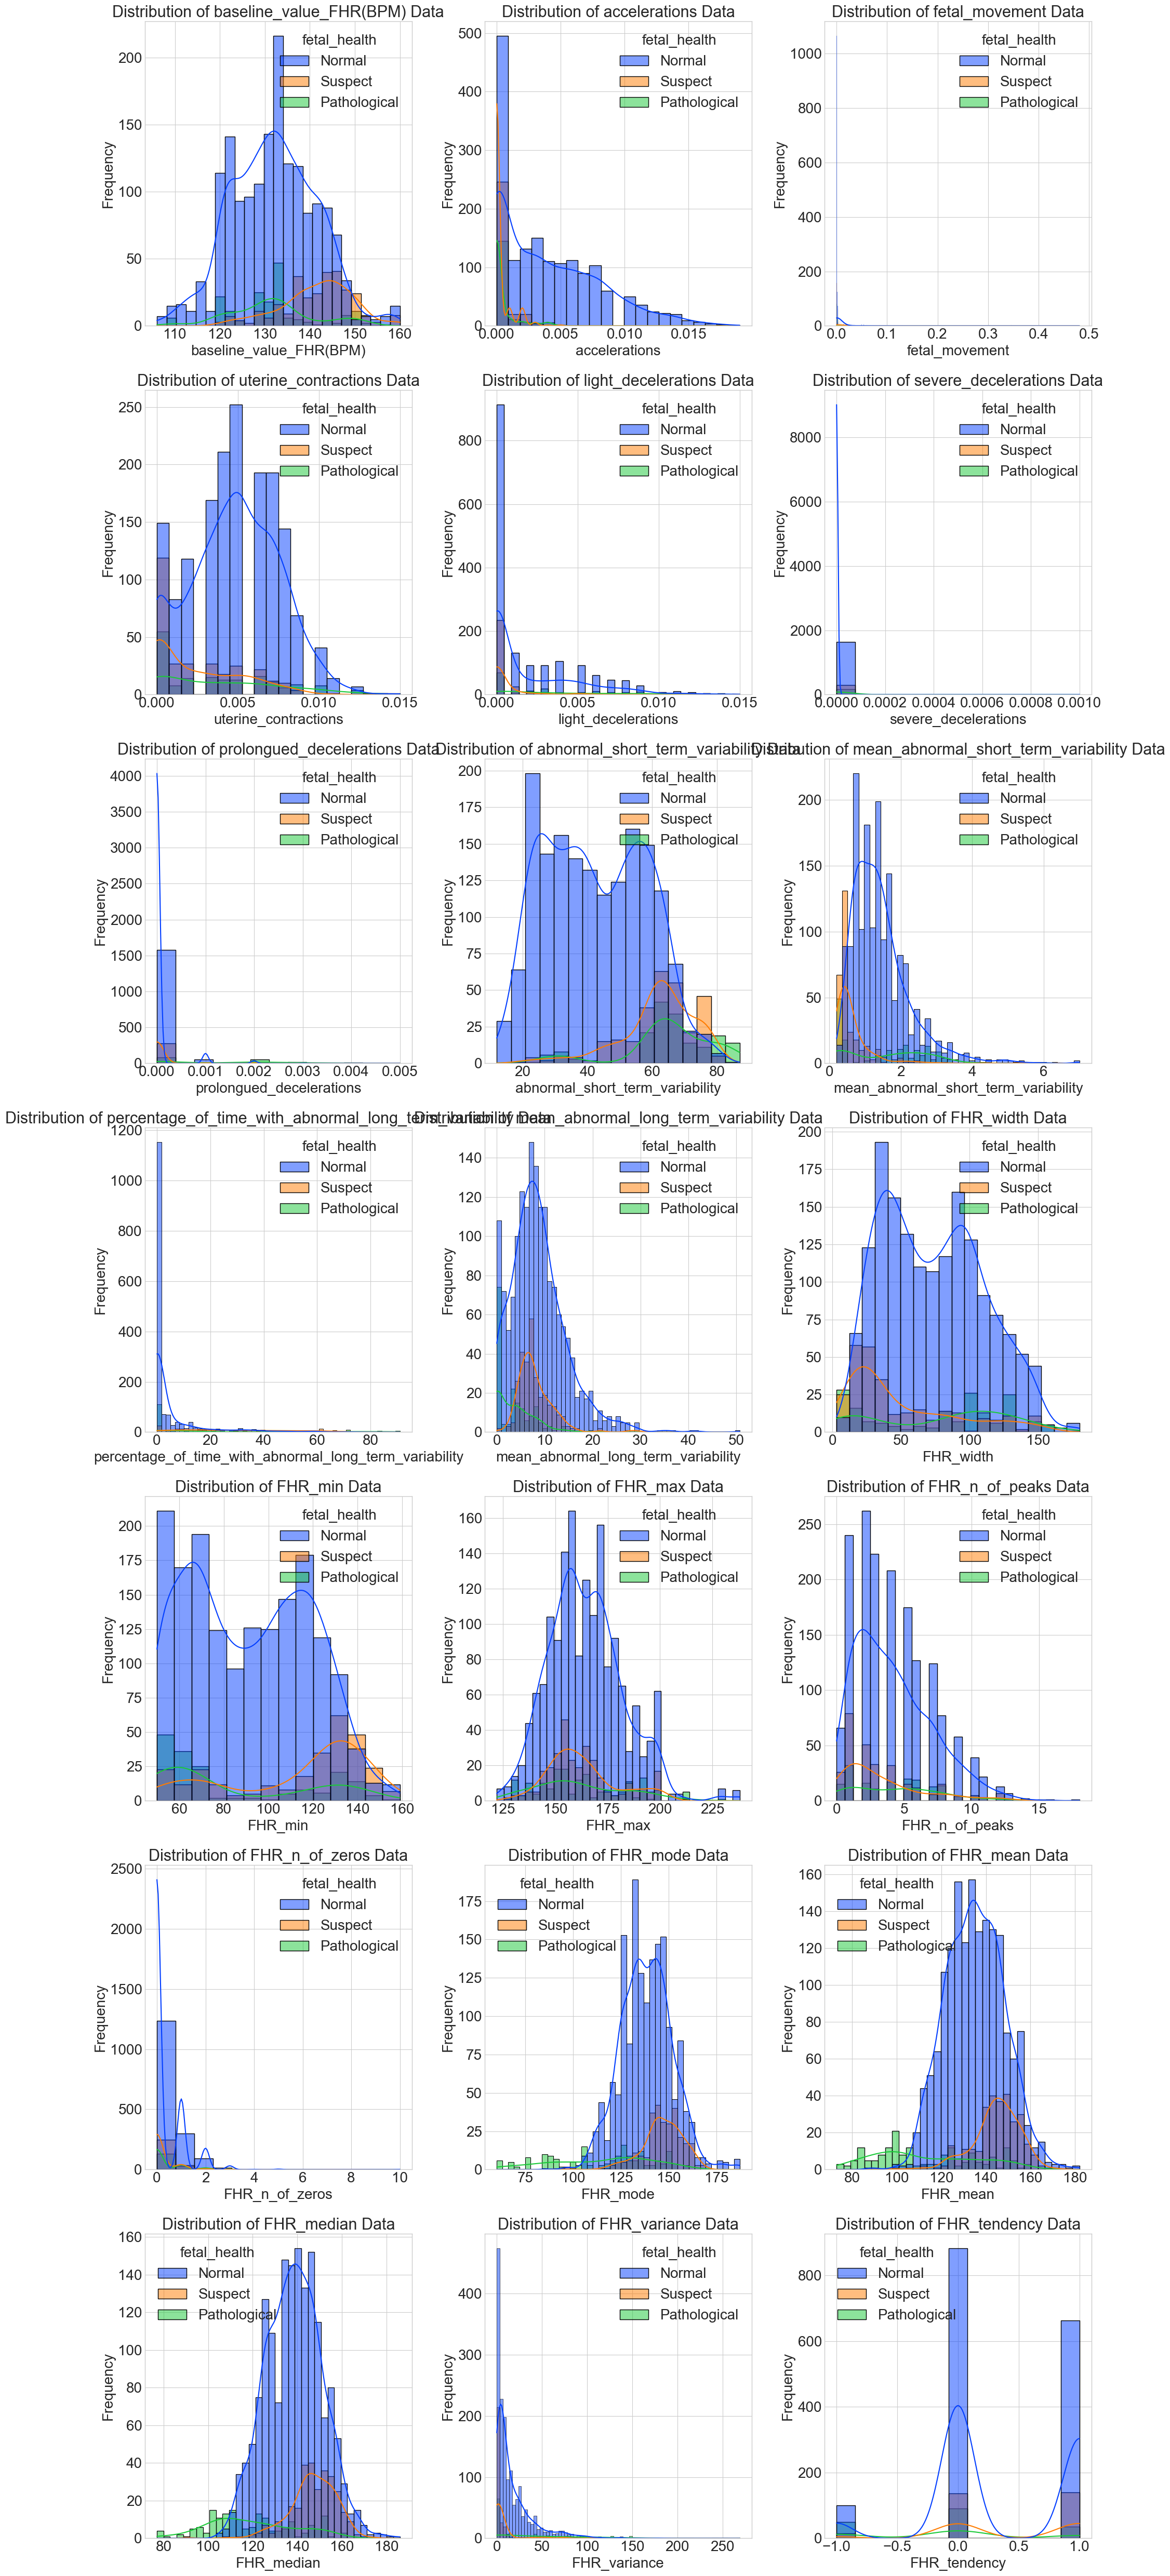

In [628]:
#Visualizing data distribution with histoplots in relation to fetal health
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings('ignore')

# Set seaborn style
plt.style.use('seaborn-v0_8-whitegrid')

# Drop the target variable from the features
X = df.drop('fetal_health', axis=1)

# Create the figure
plt.figure(figsize=(20, 50))
num_row = 1

# Loop through each column to create the subplots
for col in X.columns:
    plt.rcParams['font.size'] = 20
    plt.subplot(7, 3, num_row)
    
    # Set title with larger font size
    plt.title(f"Distribution of {col} Data", fontsize=22)  
    
    # Create the histogram with KDE and hue
    sns.histplot(x=df[col], kde=True, hue=df['fetal_health'], palette='bright', hue_order=hue_order, legend=True)

    
    # Set x and y axis labels with larger font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Frequency', fontsize=20)
    
    # Set larger font size for ticks
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    #plt.legend(title='fetal_health',title_fontsize='15', fontsize='15')
    # Adjust layout
    plt.tight_layout()
    
    num_row += 1

# Show the plots
plt.savefig('histoplots.png', format='png', dpi=300) 

plt.tight_layout()

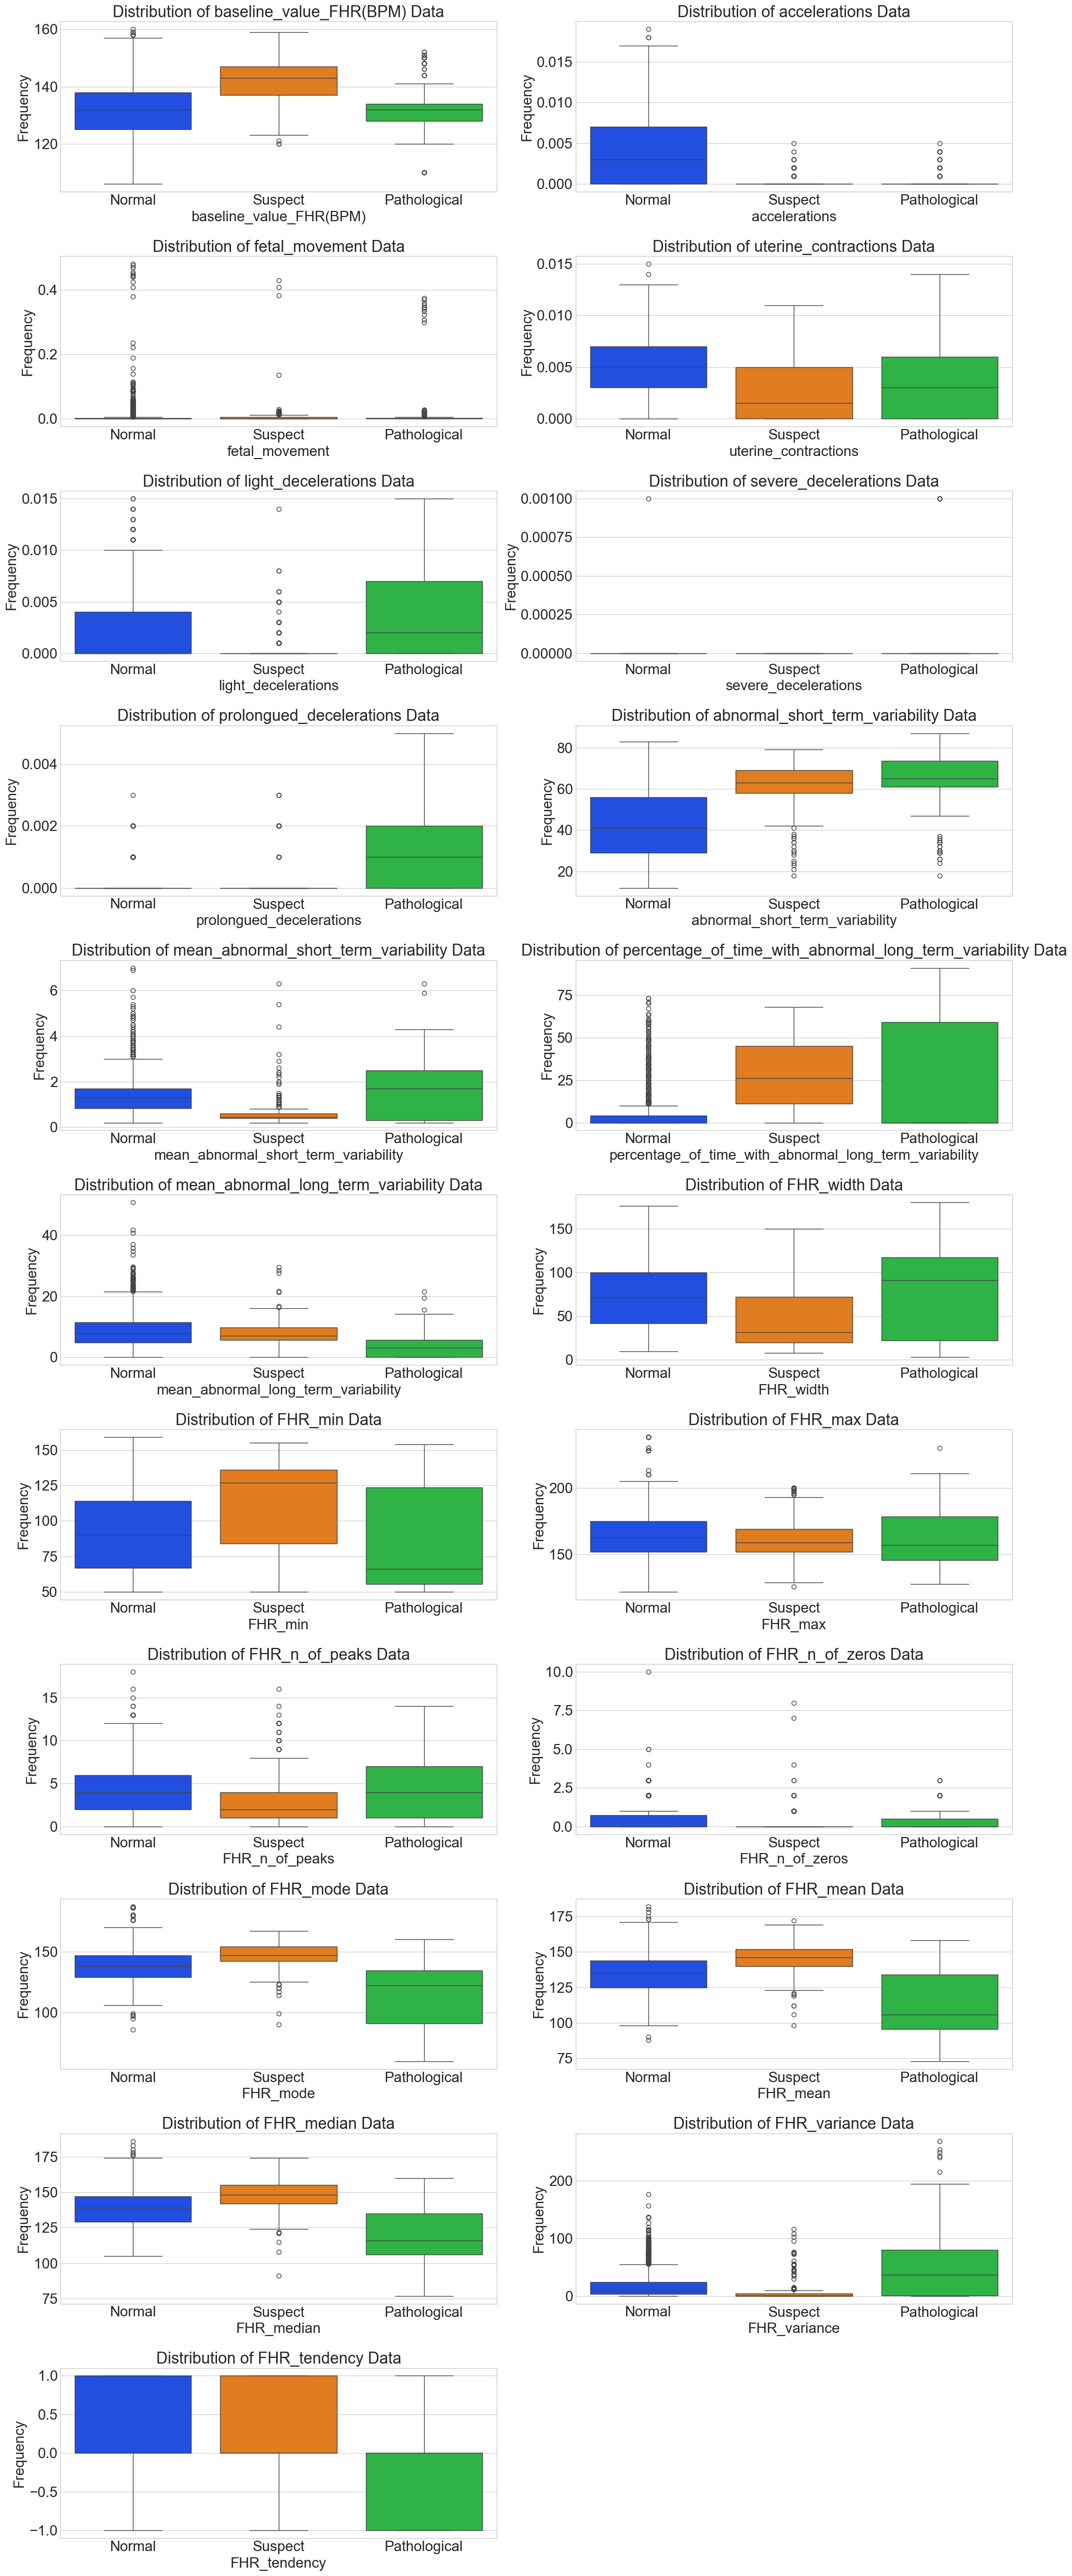

In [549]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suppress warnings
warnings.filterwarnings('ignore')

# Set seaborn style
plt.style.use('seaborn-v0_8-whitegrid')

# Drop the target variable from the features
X = df.drop('fetal_health', axis=1)

# Convert 'fetal_health' to a categorical type with the specified order
df['fetal_health'] = pd.Categorical(df['fetal_health'], 
                                     categories=["Normal", "Suspect", "Pathological"], 
                                     ordered=True)

# Create the figure
plt.figure(figsize=(20, 50))
num_row = 1

# Loop through each column to create the subplots
for col in X.columns:
    plt.rcParams['font.size'] = 20   
    plt.subplot(11, 2, num_row)
    
    # Set title with larger font size
    plt.title(f"Distribution of {col} Data", fontsize=22)  

    # Plot boxplot with the specified hue order
    sns.boxplot(y=df[col], x=df['fetal_health'], palette='bright')
              
    # Set x and y axis labels with larger font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Frequency', fontsize=20)
    
    # Set larger font size for ticks
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    # Adjust layout
    plt.tight_layout()
    
    num_row += 1

# Show the plots
plt.show()

In [550]:
#removing outliers:

# Copy the original DataFrame
df_cleaned = df.copy()

# Select only numeric columns
df_numeric = df_cleaned.select_dtypes(include="number")

# Calculate Z-scores
z_scores = df_numeric.apply(zscore)

# Remove rows where the absolute Z-score is greater than 2.8
df_cleaned = df_cleaned[(z_scores.abs() < 2.8).all(axis=1)]

# Display the cleaned DataFrame
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

Original DataFrame shape: (2113, 22)
Cleaned DataFrame shape: (1734, 22)


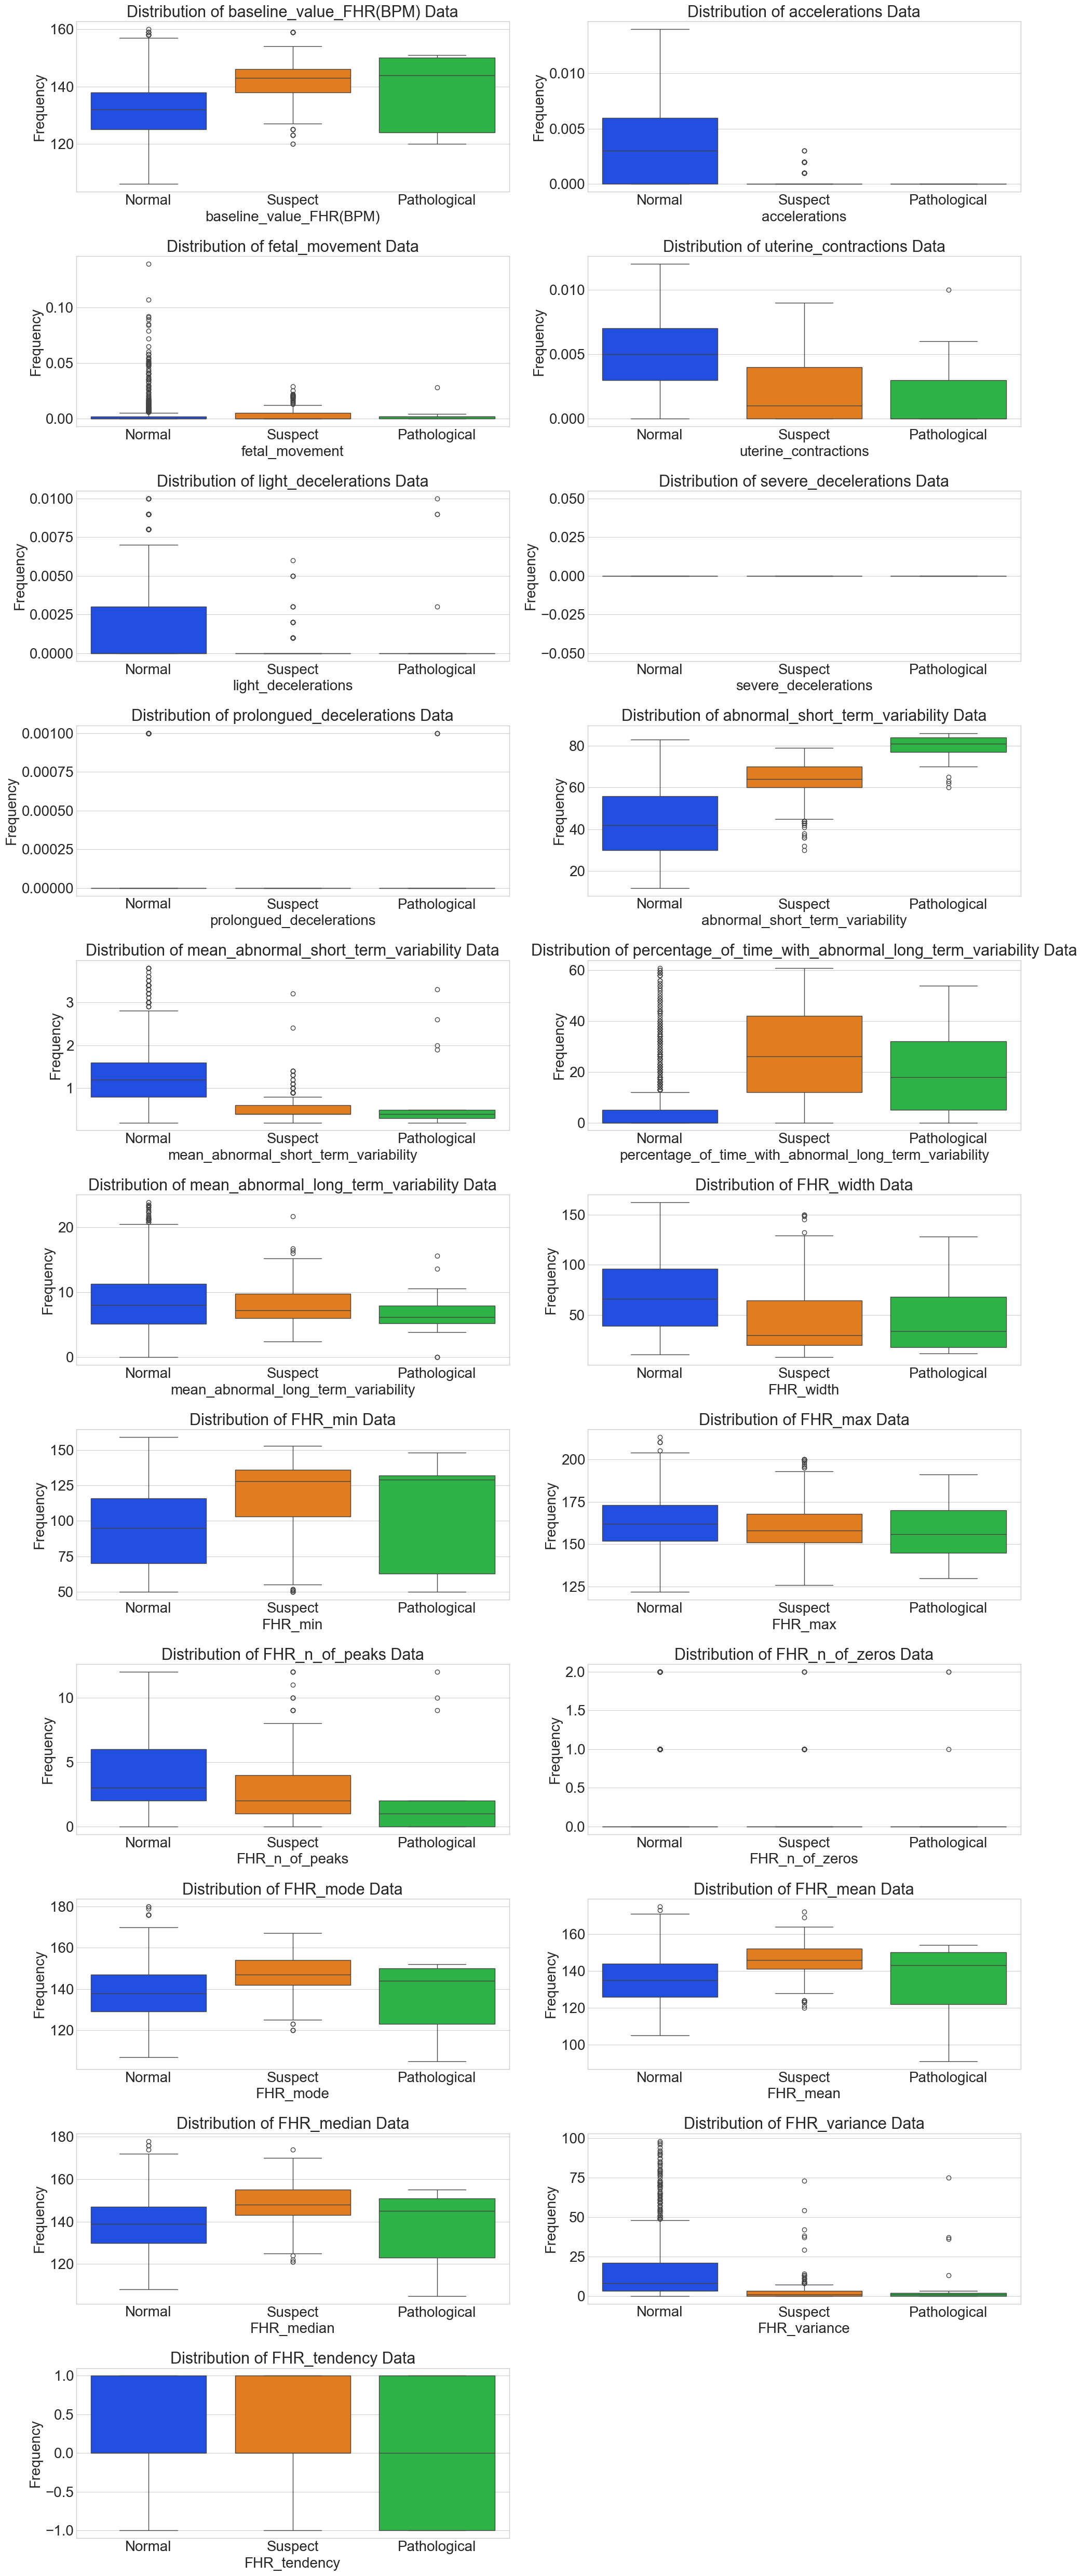

In [551]:
# Suppress warnings
warnings.filterwarnings('ignore')

# Set seaborn style
plt.style.use('seaborn-v0_8-whitegrid')

# Drop the target variable from the features
X = df_cleaned.drop('fetal_health', axis=1)

# Convert 'fetal_health' to a categorical type with the specified order
df_cleaned['fetal_health'] = pd.Categorical(df_cleaned['fetal_health'], 
                                     categories=["Normal", "Suspect", "Pathological"], 
                                     ordered=True)

# Create the figure
plt.figure(figsize=(20, 50))
num_row = 1

# Loop through each column to create the subplots
for col in X.columns:
    plt.rcParams['font.size'] = 20   
    plt.subplot(11, 2, num_row)
    
    # Set title with larger font size
    plt.title(f"Distribution of {col} Data", fontsize=22)  

    # Plot boxplot with the specified hue order
    sns.boxplot(y=df_cleaned[col], x=df_cleaned['fetal_health'], palette='bright')
              
    # Set x and y axis labels with larger font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Frequency', fontsize=20)
    
    # Set larger font size for ticks
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    # Adjust layout
    plt.tight_layout()
    
    num_row += 1

# Show the plots
plt.show()

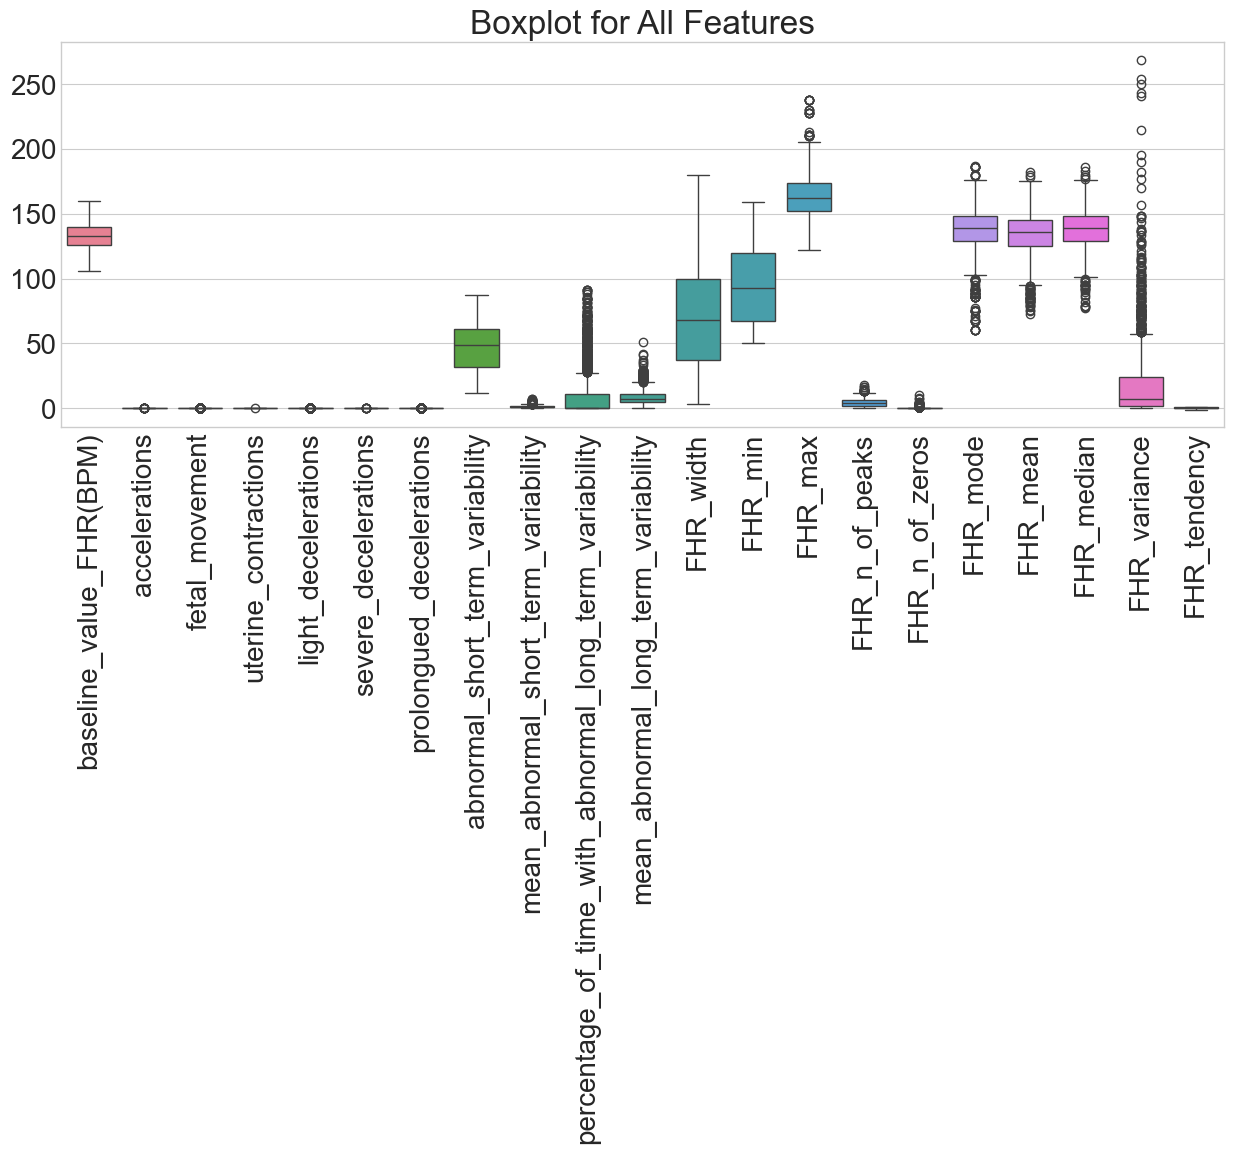

In [552]:
#identify and reduce the outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=df)
plt.title('Boxplot for All Features')
plt.xticks(rotation=90)  

plt.show()

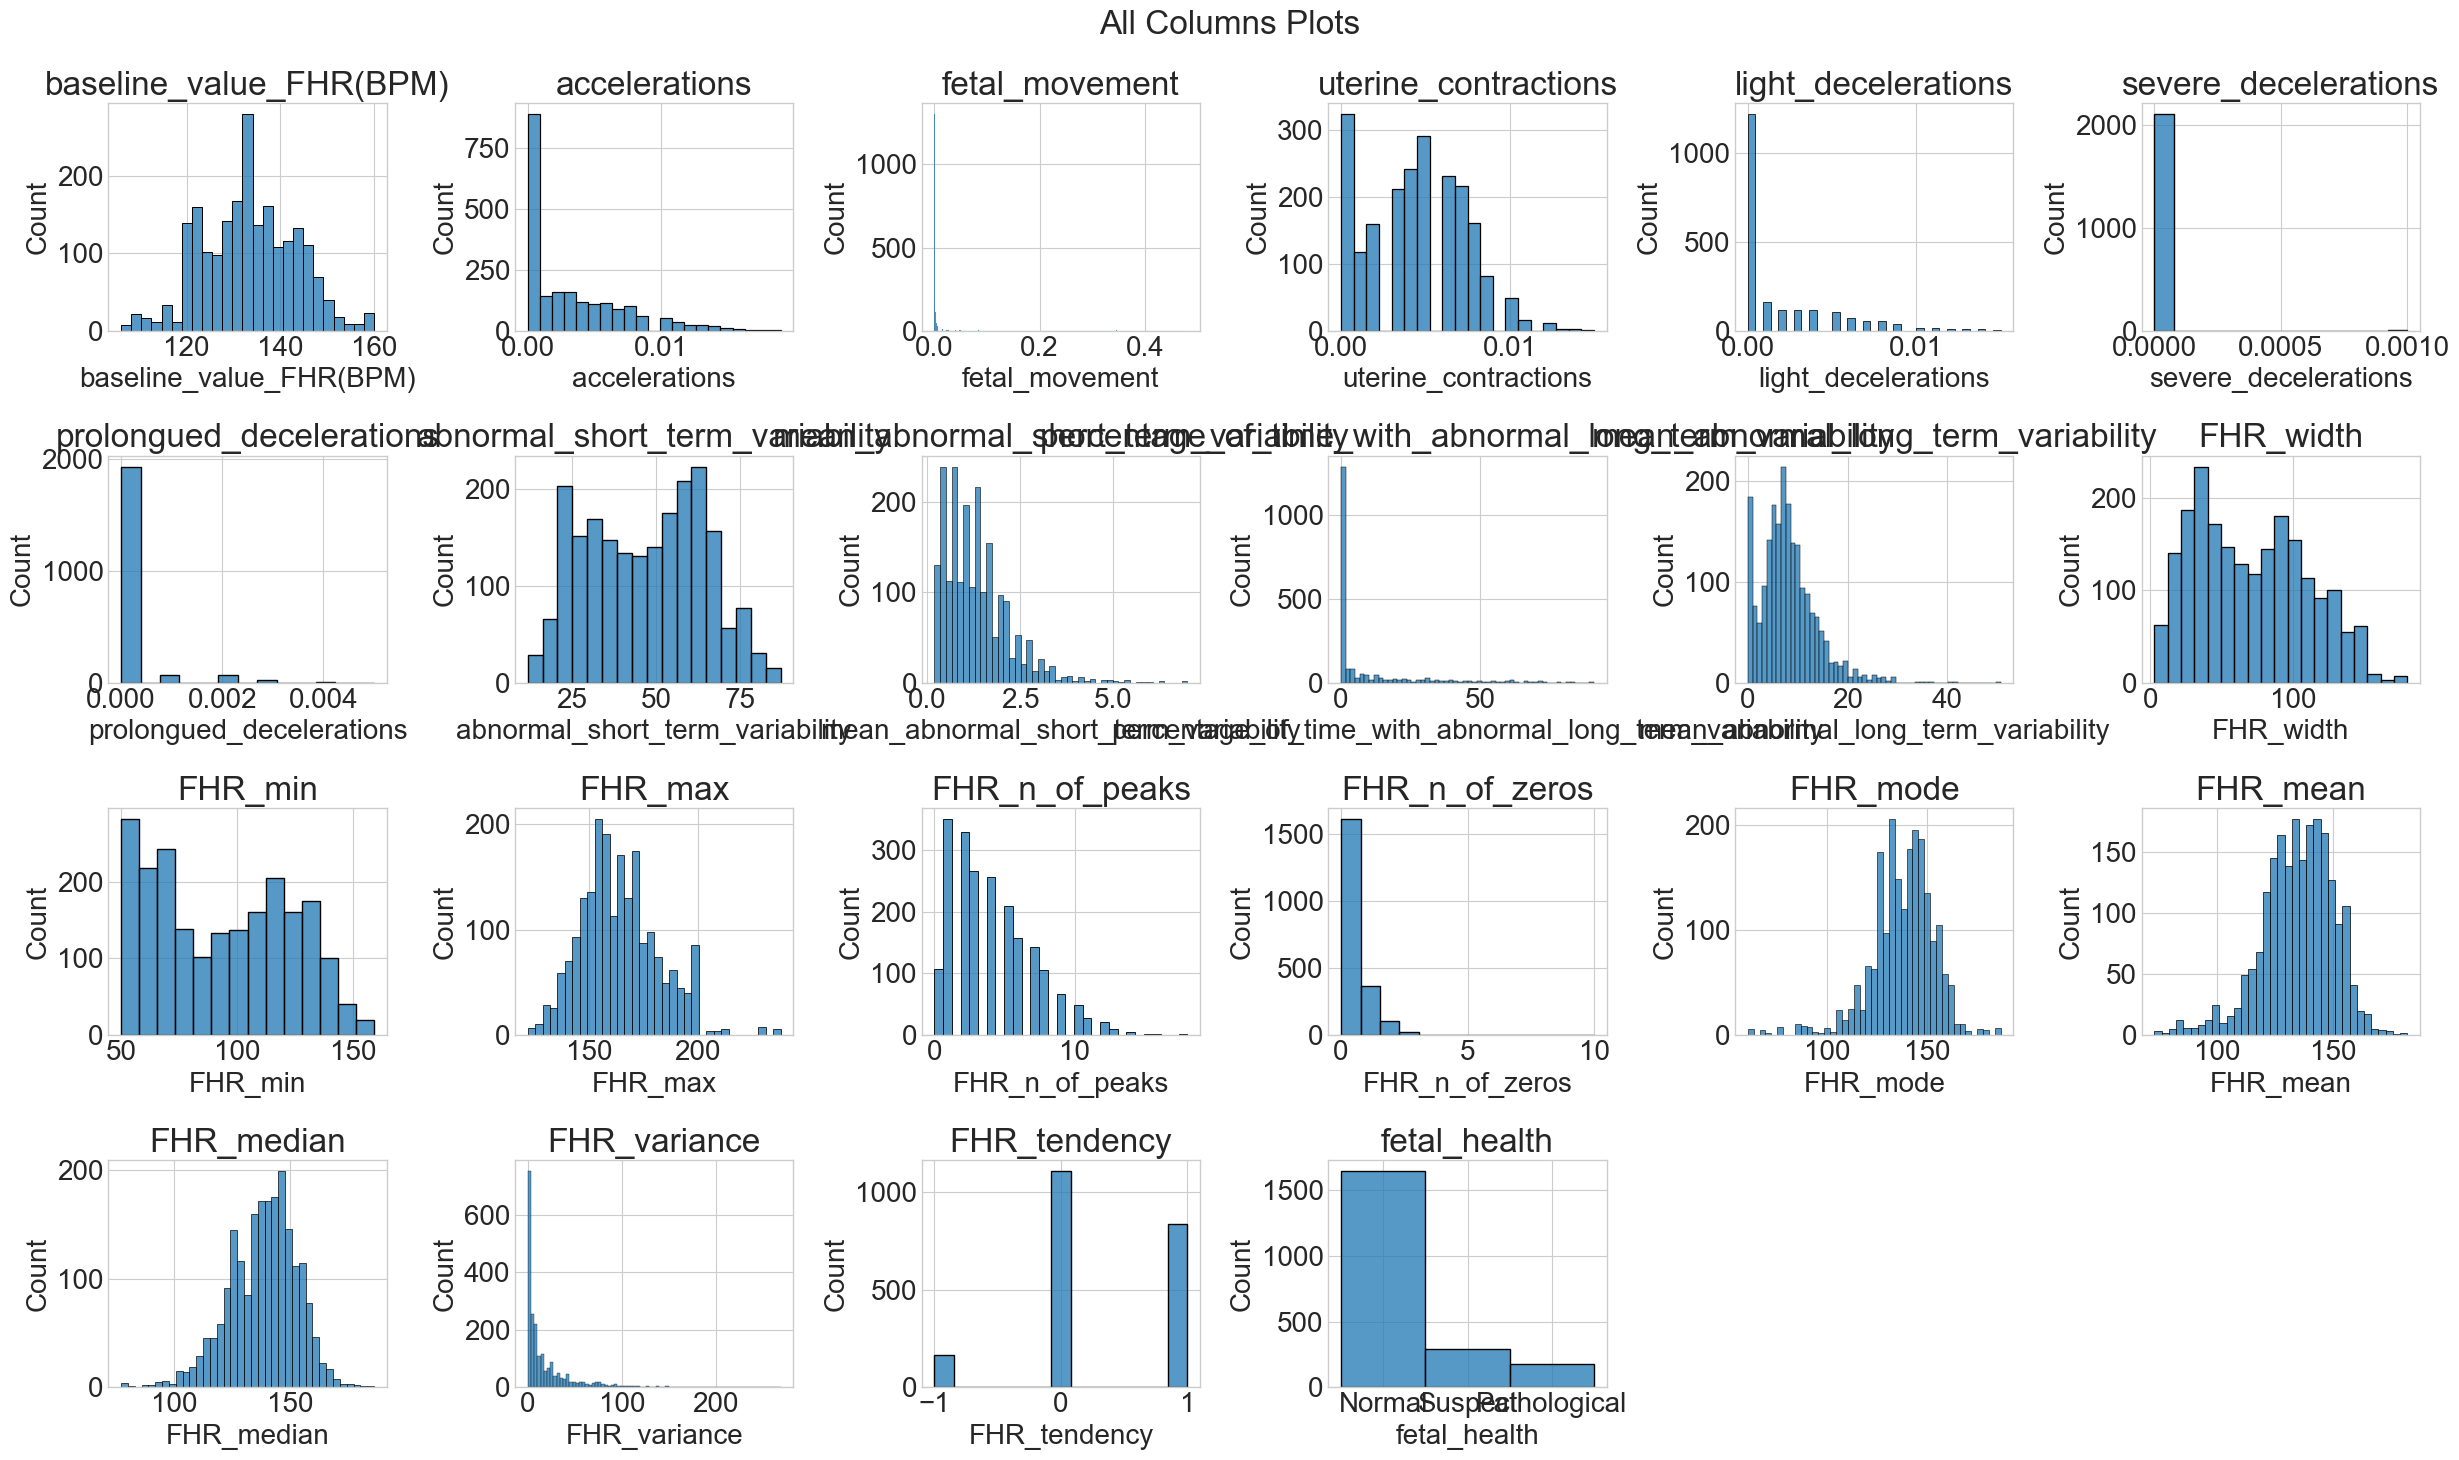

In [591]:
plt.figure(figsize = (25,15))
for i,column in enumerate(df.columns):
    plt.subplot(4,6,i+1)
    sns.histplot(data = df[column])
    plt.suptitle('All Columns Plots')
    plt.title(column)
plt.tight_layout()

In [580]:
#Saving the clean df as csv file

# Specify the folder path where you want to save the file
folder_path = "../Data/Clean/"
file_name = 'cleaned_df_fetal_health.csv'

# Combine folder path and file name
full_path = folder_path + file_name

# Save the DataFrame to the specified location
df.to_csv(full_path, index=False)